# **1) Problem statement:**

* This project understands how the students performance is affected by: Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# **2) Data collection**
* Data source https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 columns and 1000 rows.

# **2.1) Importing Data and packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

# **2.2)Data informations:**
* gender : female, male
* race: group A, group B, group C
* parental level of education: some college, associate's degree, master's degree, bachelor degree, high school
* lunch: having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score* 
reading score* 
writing score

# **3)Checks to perform:**
* check missing values
* check duplicates
* check datatype
* check the number of unique values of each column
* check statistics of dataset
* check various categories present in the different categorical column

# **3.1)Check missing values**


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# **3.2)Check duplicates**

In [5]:
df.duplicated().sum()

0

# **3.3)Check data types**

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **3.4)Number of unique values of each column**

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# **3.5)Check statistics**

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


# **3.6)Calculate the total and average score**

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['total score']= df['math score']+ df['reading score']+ df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full= df[df['reading score']==100]['average score'].count()
writing_full=df[df['writing score']==100]['average score'].count()
math_full=df[df['math score']==100]['average score'].count()

print(f'numbers of students who got full mark in reading: {reading_full}')
print(f'number of students who got full mark in writing: {writing_full}')
print(f'numbers of students who got full mark in math: {math_full}')

numbers of students who got full mark in reading: 17
number of students who got full mark in writing: 14
numbers of students who got full mark in math: 7


In [13]:
reading_full= df[df['reading score']< 50]['average score'].count()
writing_full=df[df['writing score'] < 50]['average score'].count()
math_full=df[df['math score'] < 50]['average score'].count()

print(f'numbers of students who didnt pass reading: {reading_full}')
print(f'number of students who didnt pass in writing: {writing_full}')
print(f'numbers of students who didnt pass in math: {math_full}')

numbers of students who didnt pass reading: 90
number of students who didnt pass in writing: 114
numbers of students who didnt pass in math: 135


we notice that:
* the worst performance was for Math
* the best peerformance was for Reading


# **4)Visualizing data**

# **4.1 Visualize average score distribution to make some conclusion.**

**Histogram and KDE**

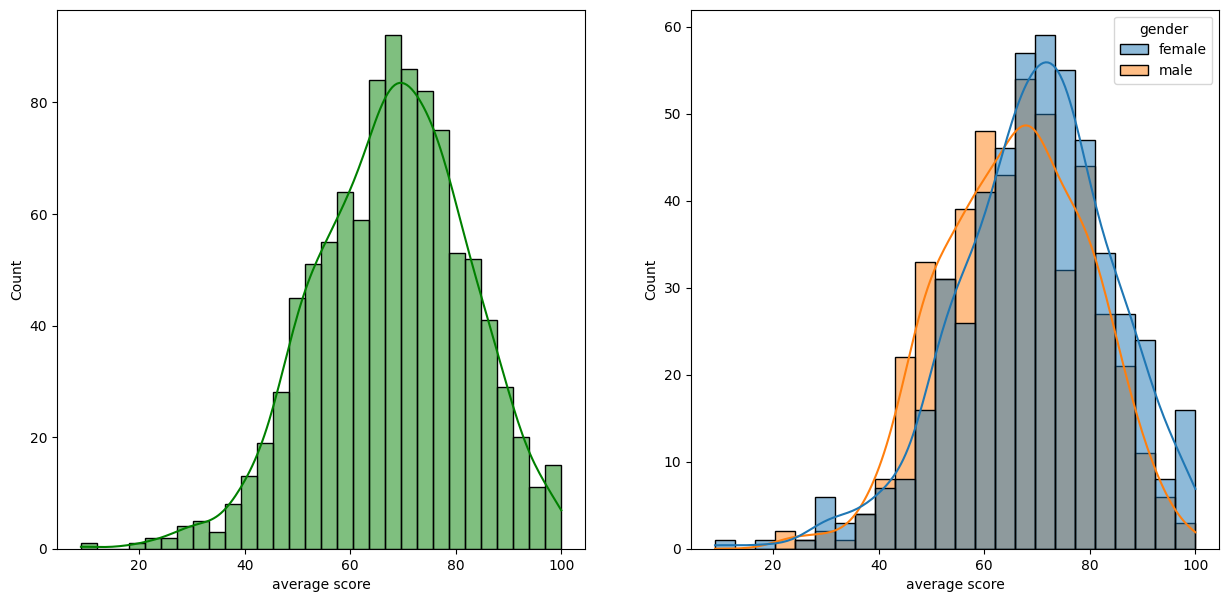

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

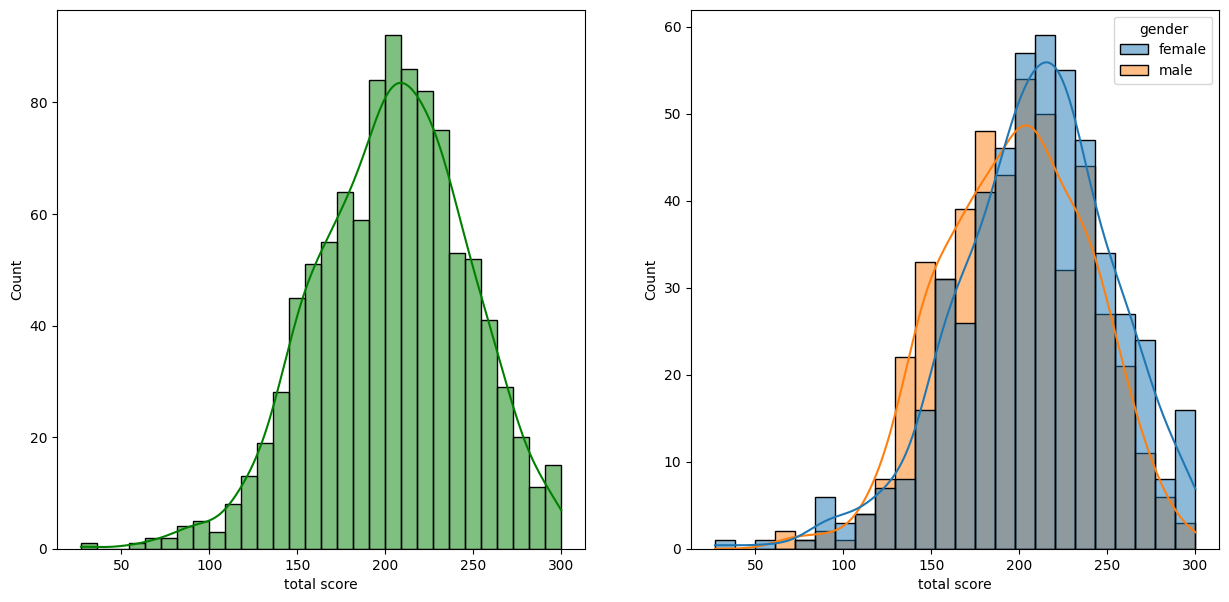

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

**Insight**
* female scores are higher than males scores